# Climate - MALIN HEAD
---
In this notebook I will check the meteorological conditions collected in the Malin Head station, in Donegal County, Ireland. This information was collected through Met Éireann in the following link
https://cli.fusio.net/cli/climate_data/webdata/hly1575.zip

I put the download contents in this repository in the csv folder.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Name of the file.
FILENAME = "hly1575.csv"

# Path to the file.
DATADIR = "./csv/"

# Identify the file.
logFilename = DATADIR + FILENAME

# Load the csv.
df = pd.read_csv(logFilename, skiprows=23)

# Check the first 3 rows.
df

C:\Users\amand\AppData\Local\Temp\ipykernel_15992\4200089125.py:11: DtypeWarning: Columns (2,6,7,8,9,12,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(logFilename, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83,...,0,11,0,130,3,2,0.0,30000,40,7
1,01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85,...,0,11,0,120,1,2,0.0,30000,100,6
2,01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91,...,0,8,0,120,1,2,0.0,30000,220,5
3,01-may-1955 04:00,3,0.0,0,7.8,0,7.2,6.1,9.6,91,...,0,18,0,130,3,2,0.0,30000,90,7
4,01-may-1955 05:00,0,0.0,0,8.1,0,7.3,6.6,9.7,89,...,0,9,0,110,2,2,0.0,40000,90,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609283,31-oct-2024 20:00,0,0.0,0,11.9,0,11.2,10.6,12.7,91,...,2,12,2,200,,,,,,
609284,31-oct-2024 21:00,0,0.0,0,11.8,0,11.1,10.4,12.6,91,...,2,13,2,210,,,,,,
609285,31-oct-2024 22:00,0,0.0,0,12.1,0,11.3,10.6,12.8,90,...,2,13,2,220,,,,,,
609286,31-oct-2024 23:00,0,0.0,0,12.0,0,11.3,10.6,12.8,90,...,2,14,2,220,,,,,,


In [3]:
# Check variable types.
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb      object
dewpt     object
vappr     object
rhum      object
msl      float64
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun       object
vis       object
clht      object
clamt     object
dtype: object

In [4]:
# Check if there are any missing values in the data set.
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [5]:
# Check if there are any empty values.
df.eq(" ").sum()

date          0
ind           0
rain          3
ind.1         0
temp          0
ind.2         0
wetb          6
dewpt         6
vappr         6
rhum          6
msl           0
ind.3         0
wdsp         52
ind.4         0
wddir       106
ww       130148
w        130148
sun      130032
vis      130228
clht     130172
clamt    130172
dtype: int64

In [6]:
# check if there are "0" values.
df.eq(0).sum()

date          0
ind      488318
rain     442062
ind.1    607604
temp        276
ind.2    605431
wetb        761
dewpt      7339
vappr         0
rhum          0
msl           0
ind.3    173882
wdsp       3280
ind.4    173883
wddir      3229
ww            1
w         36843
sun      347857
vis           0
clht         22
clamt      6723
dtype: int64

The minimum wind speed necessary to produce energy is 8-12 miles per hour

Wind turbines typically start operating at wind speeds around Beaufort Force 3 (or 8-12 miles per hour (mph)). Turbines reach maximum power output at Beaufort 5 (25-30 mph). At very high wind speeds, i.e. Beaufort Storm Force 10 winds, (55 mph) or greater the wind turbines shut down to prevent excessive wear and tear.

http://www.iwea.ie/index.cfm/page/technicalfaqs?#q29
https://www.met.ie/forecasts/marine-inland-lakes/beaufort-scale

wdsp starts > 7
wdsp max production = 21
wdsp stop > 48

In [7]:
#  Use datetime to treat the column "date" as datetime object.
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [8]:
days= df["date"].dt.strftime("%Y-%m-%d")
months= df["date"].dt.strftime("%Y-%m")
year= df["date"].dt.strftime("%Y")

In [9]:
# New data frame with date and wind speed.
dfws=df[["date","wdsp"]]

# Drop the empty values.
dfws = dfws[dfws["wdsp"] != " "]
dfws = dfws[dfws["wdsp"] != 0]

dfws

,date,wdsp
0,1955-05-01 01:00:00,11
1,1955-05-01 02:00:00,11
2,1955-05-01 03:00:00,8
3,1955-05-01 04:00:00,18
4,1955-05-01 05:00:00,9
...,...,...
609283,2024-10-31 20:00:00,12
609284,2024-10-31 21:00:00,13
609285,2024-10-31 22:00:00,13
609286,2024-10-31 23:00:00,14


In [10]:
# Change the "wdsp" type from object to int.
dfws["wdsp"] = pd.to_numeric(dfws["wdsp"], errors="coerce")

# Drop the "0" values
dfws = dfws[dfws["wdsp"] != 0]

In [11]:
print(max(dfws["wdsp"]))
# https://realpython.com/python-min-and-max/#calling-min-and-max-with-a-single-iterable-argument

63


In [12]:
#dfws = dfws[dfws["wdsp"] > 7]
#dfws = dfws[dfws["wdsp"] < 48]
# https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/

In [13]:
# Import Matplotlib and Seaborn libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Calculate the daily wind speed mean.
daily_mean_wind = dfws.groupby(days)["wdsp"].transform("mean")

# Create a new column.
dfws["daily_mean_wind"] = daily_mean_wind

# Check
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_15992\3023844052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["daily_mean_wind"] = daily_mean_wind


,date,wdsp,daily_mean_wind
0,1955-05-01 01:00:00,11,19.434783
1,1955-05-01 02:00:00,11,19.434783
2,1955-05-01 03:00:00,8,19.434783


In [15]:
# Set the size of the figure.
plt.rcParams["figure.figsize"] = (20, 10)

# Define the grid parameters to use in the plots.
def grid():
    plt.minorticks_on() # Minor ticks between the main ticks.
    plt.grid(which="both", linestyle="--") # Configure the grid lines.
    plt.axhline(y = 7, color = 'r', linestyle = '-')
    plt.axhline(y = 28, color = 'g', linestyle = ':')
    plt.annotate("MIN", xy=(-6000, 7), xycoords='data', xytext=(0, -30), textcoords='offset points', size=10, 
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-90,rad=10"))
    plt.annotate("Optimal", xy=(-6000, 28), xycoords='data', xytext=(0, 30), textcoords='offset points', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=45,rad=10"))

<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

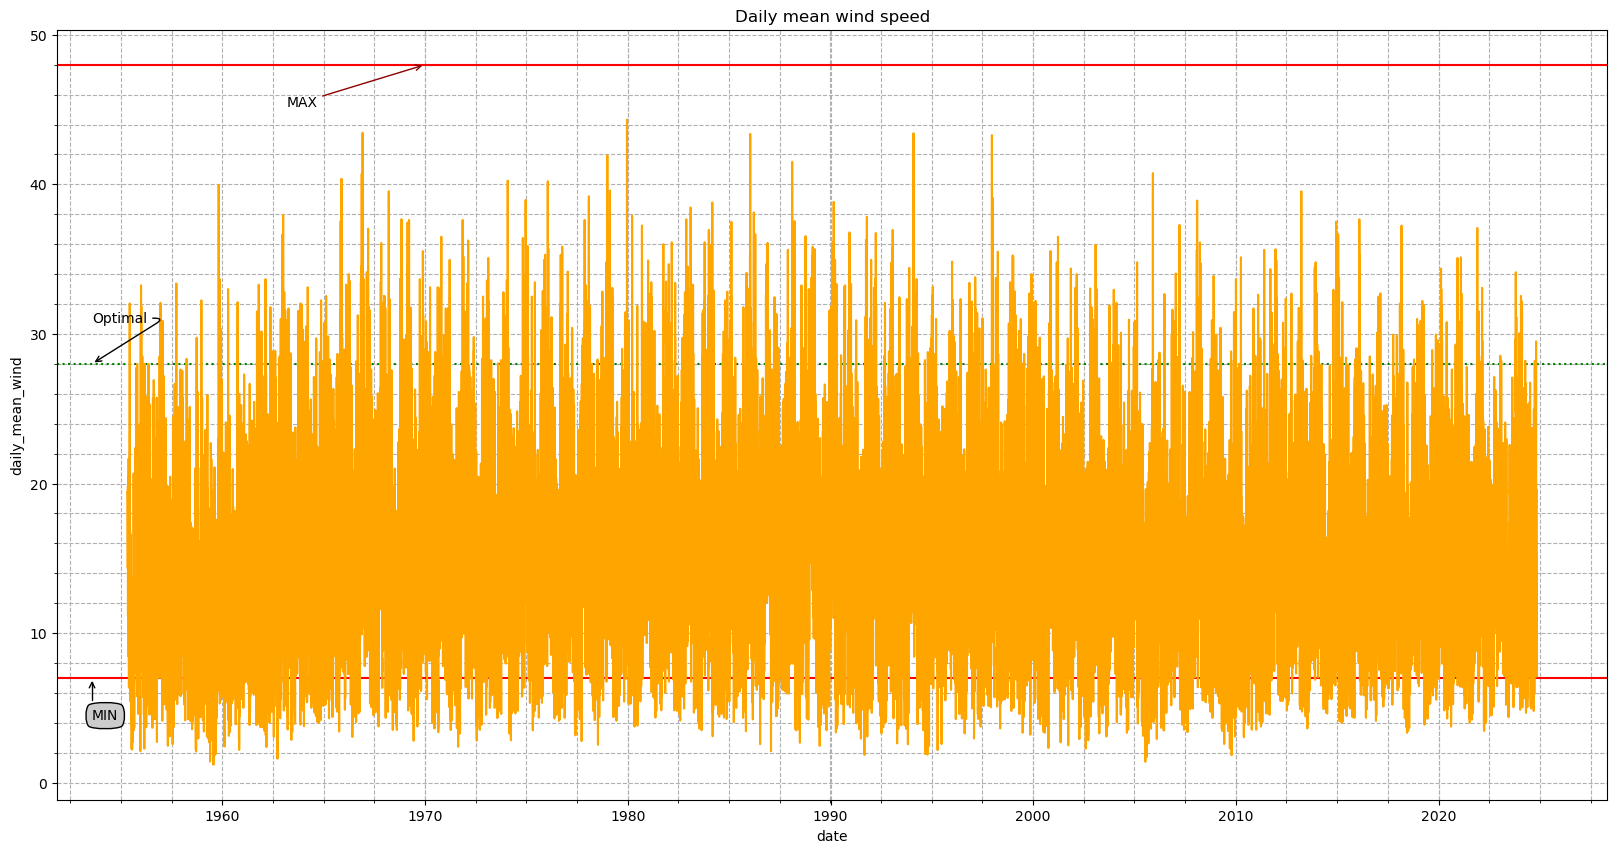

In [16]:
plt.axhline(y = 48, color = 'r', linestyle = '-')

plt.annotate("MAX", xy=(0,48), xytext=(-100, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='darkred'))
grid()
plt.title("Daily mean wind speed")
sns.lineplot(data=dfws, x="date", y="daily_mean_wind", color="orange")

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
# https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html

In [17]:
# Calculate the daily wind speed mean.
monthly_mean_wind = dfws.groupby(months)["wdsp"].transform("mean")

# Create a new column.
dfws["monthly_mean_wind"] = monthly_mean_wind

# Check
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_15992\2397496332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["monthly_mean_wind"] = monthly_mean_wind


,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11,19.434783,14.651351
1,1955-05-01 02:00:00,11,19.434783,14.651351
2,1955-05-01 03:00:00,8,19.434783,14.651351


<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='date', ylabel='monthly_mean_wind'>

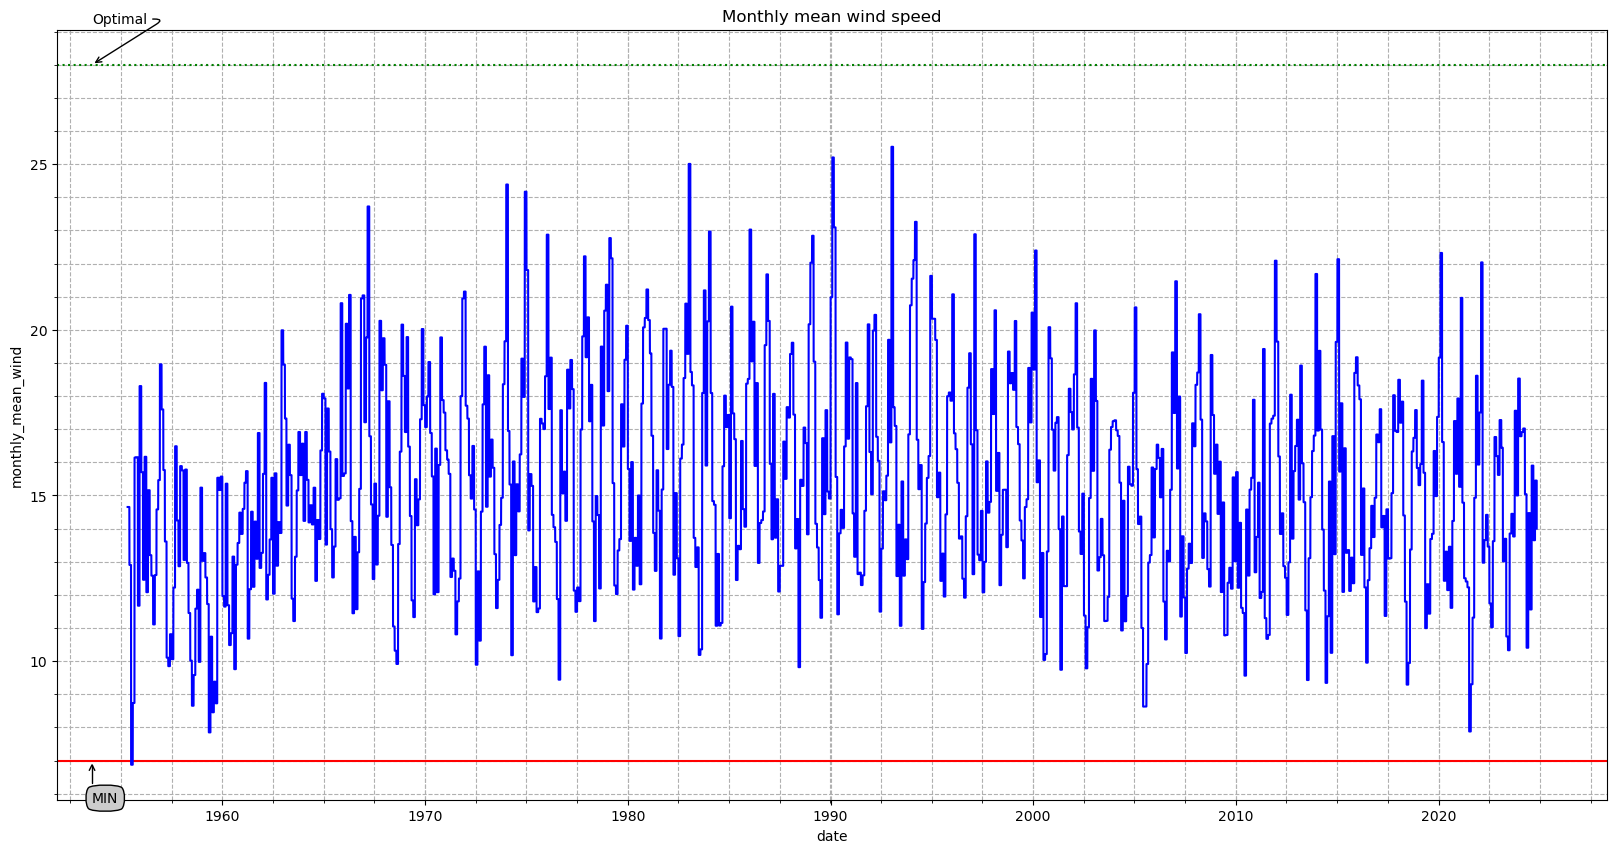

In [18]:
grid()
plt.title("Monthly mean wind speed")
sns.lineplot(data=dfws, x="date", y="monthly_mean_wind", color="blue")

In [19]:
# Calculate the daily wind speed mean.
yearly_mean_wind = dfws.groupby(year)["wdsp"].transform("mean")

# Create a new column.
dfws["yearly_mean_wind"] = yearly_mean_wind

# Check
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_15992\730355491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["yearly_mean_wind"] = yearly_mean_wind


,date,wdsp,daily_mean_wind,monthly_mean_wind,yearly_mean_wind
0,1955-05-01 01:00:00,11,19.434783,14.651351,13.276689
1,1955-05-01 02:00:00,11,19.434783,14.651351,13.276689
2,1955-05-01 03:00:00,8,19.434783,14.651351,13.276689


<Axes: title={'center': 'Yearly mean wind speed'}, xlabel='date', ylabel='yearly_mean_wind'>

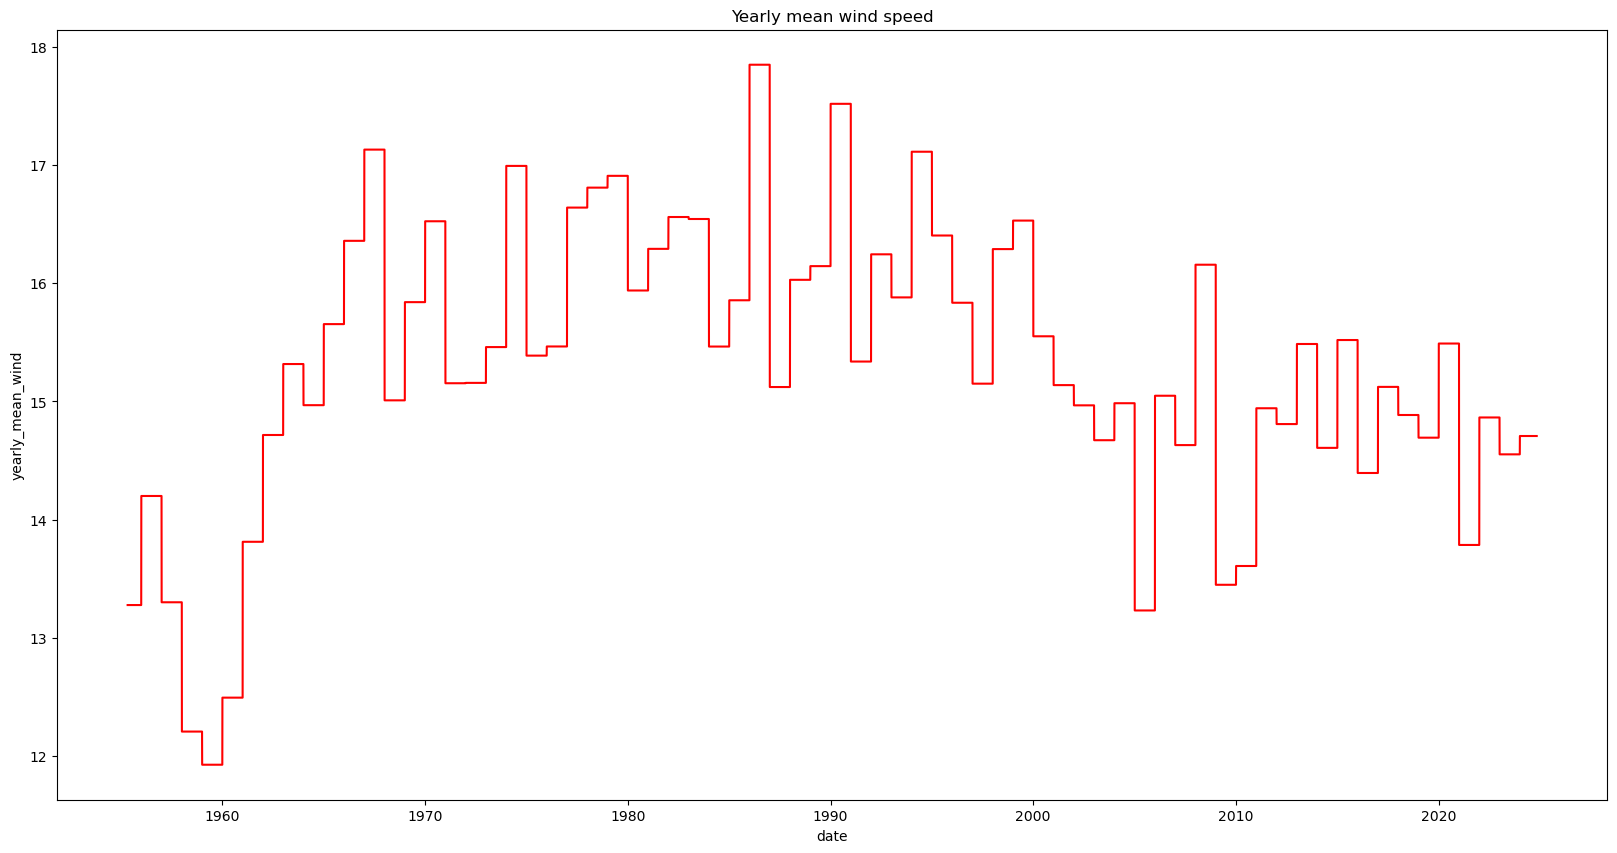

In [20]:
plt.title("Yearly mean wind speed")
sns.lineplot(data=dfws, x="date", y="yearly_mean_wind", color="red")

In [21]:
# Filter for rows where the year is 2010
df2010=dfws
df2010 = dfws[dfws["date"].dt.year ==2010]

#df2010=df[["date","wdsp"]]
#df2010['data_2010'] = df2010['date'].apply(lambda x: x if x.year == 2010 else pd.NaT)
#df2010 = df2010.dropna(subset=['data_2010'])
#df2010.head(3)
df2010
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

,date,wdsp,daily_mean_wind,monthly_mean_wind,yearly_mean_wind
479255,2010-01-01 00:00:00,5,9.083333,15.704301,13.607192
479256,2010-01-01 01:00:00,9,9.083333,15.704301,13.607192
479257,2010-01-01 02:00:00,5,9.083333,15.704301,13.607192
479258,2010-01-01 03:00:00,5,9.083333,15.704301,13.607192
479259,2010-01-01 04:00:00,6,9.083333,15.704301,13.607192
...,...,...,...,...,...
488010,2010-12-31 19:00:00,12,7.791667,12.681452,13.607192
488011,2010-12-31 20:00:00,13,7.791667,12.681452,13.607192
488012,2010-12-31 21:00:00,12,7.791667,12.681452,13.607192
488013,2010-12-31 22:00:00,13,7.791667,12.681452,13.607192


<Axes: title={'center': '2010 wind speed'}, xlabel='date', ylabel='wdsp'>

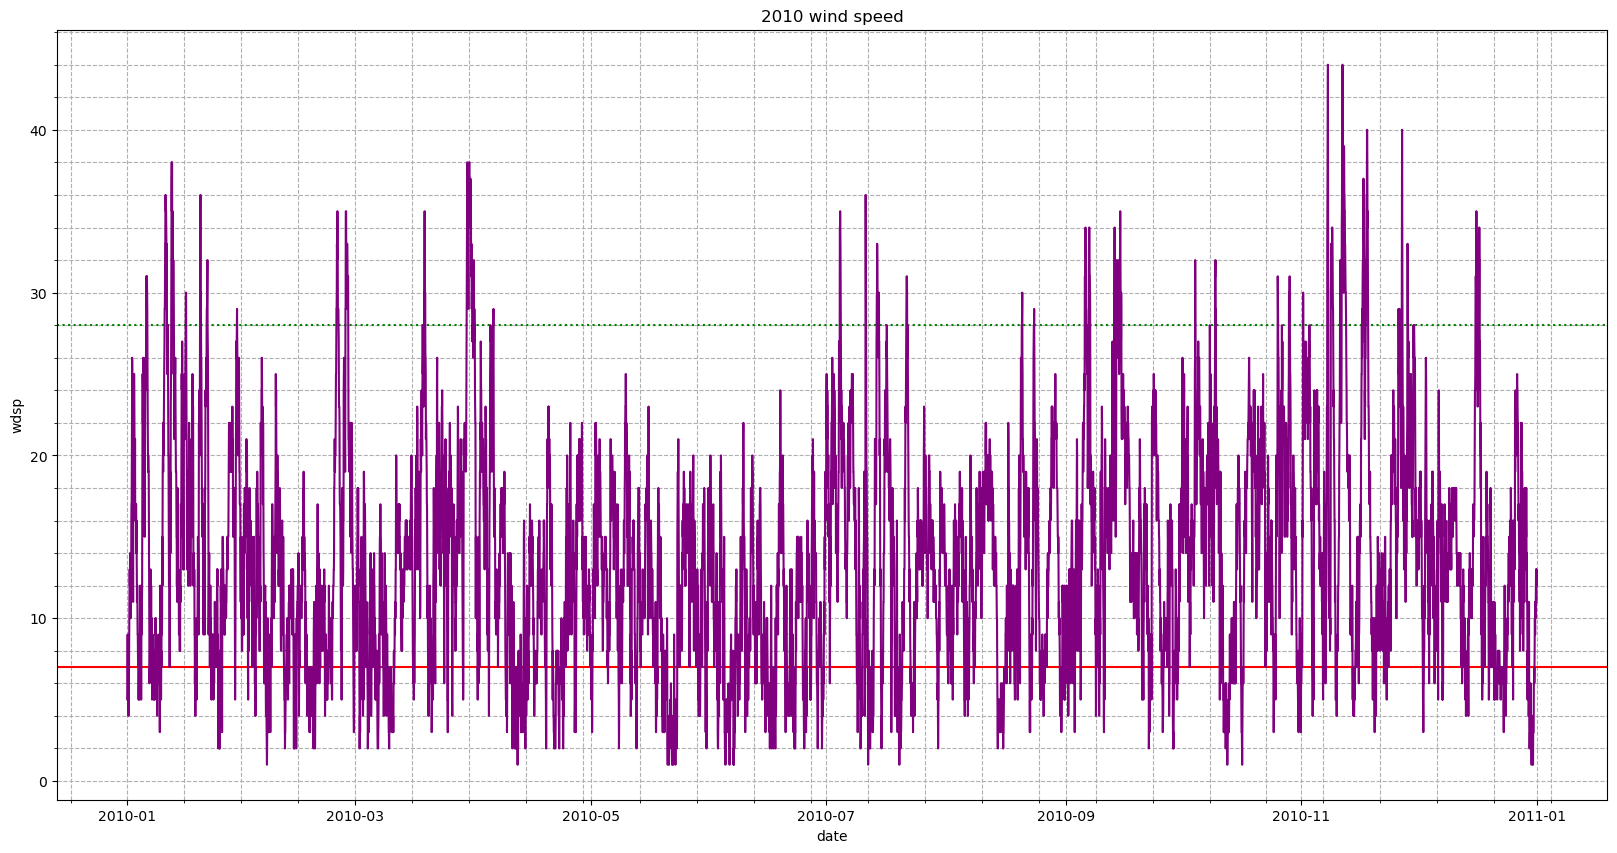

In [22]:
grid()
plt.title("2010 wind speed")
sns.lineplot(data=df2010, x="date", y="wdsp", color="purple")

In [23]:
dfdec=dfws
dfdec = dfws[dfws["date"].dt.year >=2014]

<Axes: title={'center': '2014/2024 mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

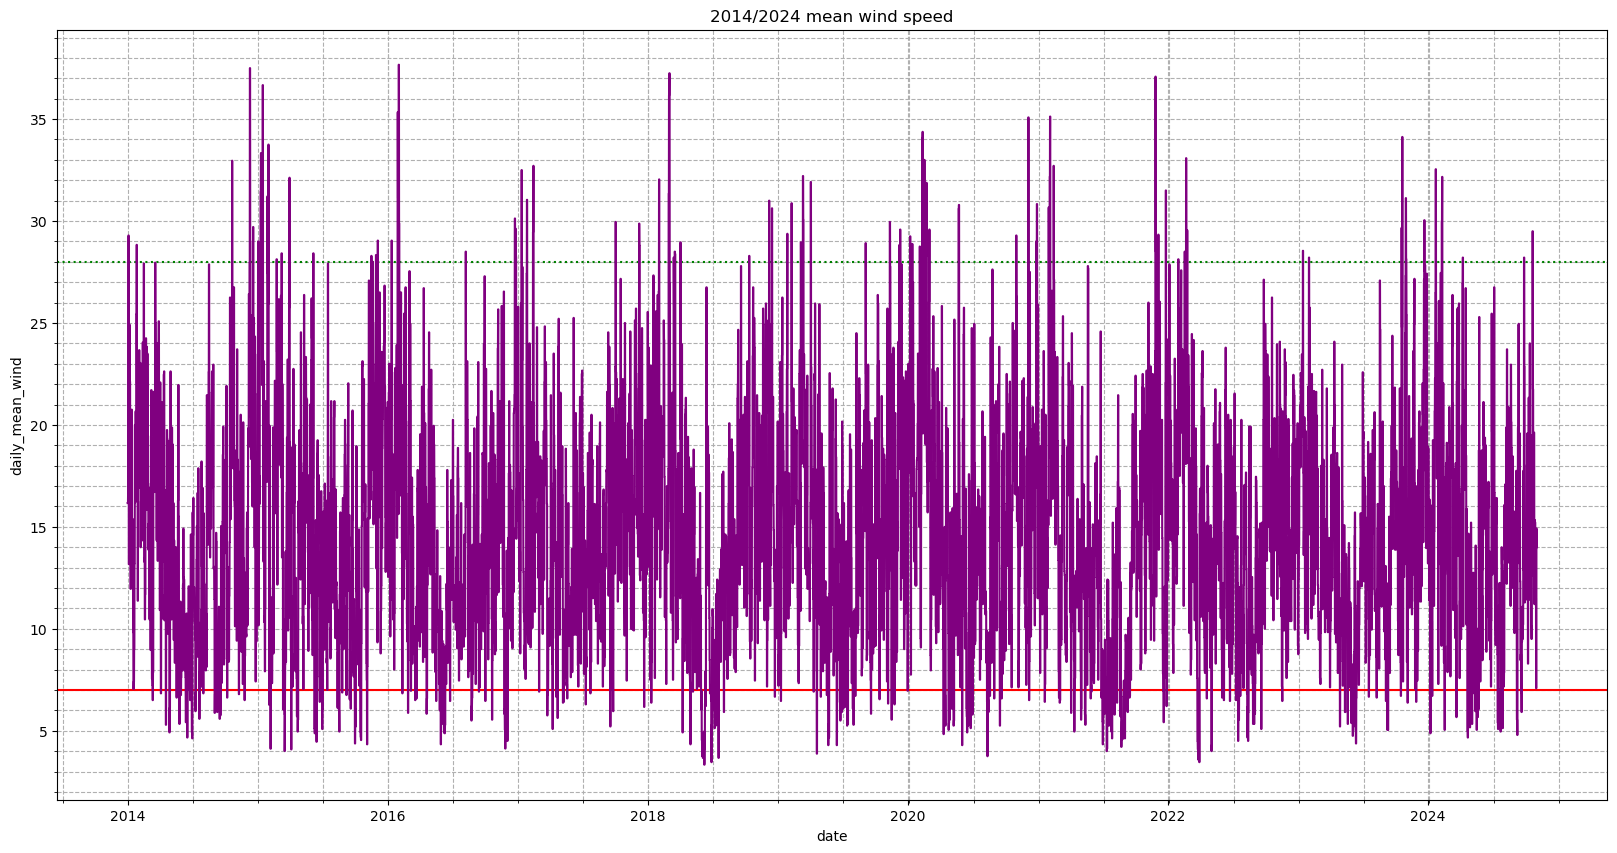

In [24]:
grid()
plt.title("2014/2024 mean wind speed")
sns.lineplot(data=dfdec, x="date", y="daily_mean_wind", color="purple")